<a href="https://colab.research.google.com/github/mohanrajmit/AGE_ESTIMATION/blob/master/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pathlib import Path
import numpy as np
import joblib
from keras.preprocessing import image
from keras.applications import xception

# Empty lists to hold the images and labels for each each image
x_train = []
y_train = []

In [29]:

!git clone https://github.com/mohanrajmit/AGE_ESTIMATION.git

fatal: destination path 'AGE_ESTIMATION' already exists and is not an empty directory.


In [30]:
!git clone https://github.com/mohanrajmit/AgeCalculation.git

fatal: destination path 'AgeCalculation' already exists and is not an empty directory.


In [31]:
!ls

AgeCalculation	output.csv   x_train.dat
AGE_ESTIMATION	sample_data  y_train.dat


In [0]:

import pandas as pd
data=pd.read_csv("/content/AgeCalculation/dataset/train.csv")

image_name = data["ID"]
label_name = data["Class"]



In [33]:
!git clone https://github.com/mohanrajmit/AgeCalculation.git

fatal: destination path 'AgeCalculation' already exists and is not an empty directory.


In [0]:
dataset_path="/content/AgeCalculation/dataset/Train/"

In [0]:
# Load the training data set by looping over every image file
for image_name1,label in zip(image_name,label_name):

    image_file = str(dataset_path+image_name1)
    # Load the current image file
    image_data = image.load_img(image_file, target_size=(73, 73))

    # Convert the loaded image file to a numpy array
    image_array = image.img_to_array(image_data)

    # Add the current image to our list of training images
    x_train.append(image_array)

    y_train.append(label)
    

In [36]:
# Convert the list of separate images into a single 4D numpy array. This is what Keras expects.
x_train = np.array(x_train)

# Normalize image data to 0-to-1 range
x_train = xception.preprocess_input(x_train)

# Load the pre-trained neural network to use as a feature extractor
feature_extractor = xception.Xception(weights='imagenet', include_top=False, input_shape=(73, 73, 3))

# Extract features for each image (all in one pass)
features_x = feature_extractor.predict(x_train)

# Save the array of extracted features to a file
joblib.dump(features_x, "x_train.dat")

# Save the matching array of expected values to a file
joblib.dump(y_train, "y_train.dat")


['y_train.dat']

In [0]:
# Load data set of extracted features
x_train = joblib.load("x_train.dat")
y_train = joblib.load("y_train.dat")


In [38]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)



ValueError: ignored

In [0]:
# get the shape of training labels
print ("[STATUS] training labels: {}".format(y_train))
print ("[STATUS] training labels shape: {}".format(y_train.shape))


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


In [0]:
print(x_train.shape)

In [0]:
# Create a model and add layers
model = Sequential()

# Add layers to our model
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [0]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    shuffle=True,
    verbose=2)

# Save the trained model to a file so we can use it to make predictions later
model.save("age_classifier_model.h5")

Text(0.5, 1.0, 'Training and validation loss')

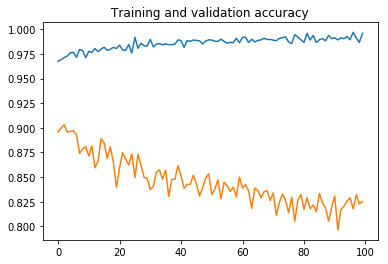

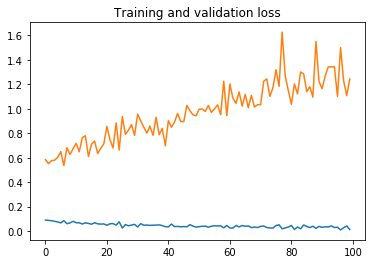

In [0]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )